# Importing libraries in the notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# Reading the data set Loan_modelling.csv and displying the first 5 rows

In [ ]:
lm = pd.read_csv('Loan_Modelling.csv')
lm.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
lm.shape

(5000, 14)

In [ ]:
lm.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
lm.columns = [col.replace(' ','_') for col in lm.columns]
lm.columns = [col.replace('/','_') for col in lm.columns]
lm.columns = [col.replace('-','_') for col in lm.columns]

In [ ]:
lm.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = lm.select_dtypes(include=np.number).columns.tolist()
lm[numeric_columns] = lm[numeric_columns].apply(medianFiller,axis=0)

In [ ]:
lm.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
lm.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.000,2500.500,1443.520,1.000,1250.750,2500.500,3750.250,5000.000
Age,5000.000,45.338,11.463,23.000,35.000,45.000,55.000,67.000
Experience,5000.000,20.105,11.468,-3.000,10.000,20.000,30.000,43.000
Income,5000.000,73.774,46.034,8.000,39.000,64.000,98.000,224.000
ZIPCode,5000.000,93169.257,1759.455,90005.000,91911.000,93437.000,94608.000,96651.000
Family,5000.000,2.396,1.148,1.000,1.000,2.000,3.000,4.000
CCAvg,5000.000,1.938,1.748,0.000,0.700,1.500,2.500,10.000
Education,5000.000,1.881,0.840,1.000,1.000,2.000,3.000,3.000
Mortgage,5000.000,56.499,101.714,0.000,0.000,0.000,101.000,635.000
Personal_Loan,5000.000,0.096,0.295,0.000,0.000,0.000,0.000,1.000


In [ ]:
lm.head()
#plt.scatter(x=lm['Income'], y=lm['Personal_Loan'])

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


# EDA (UNIVARIATE AND BIVARIATE ANALYSIS)

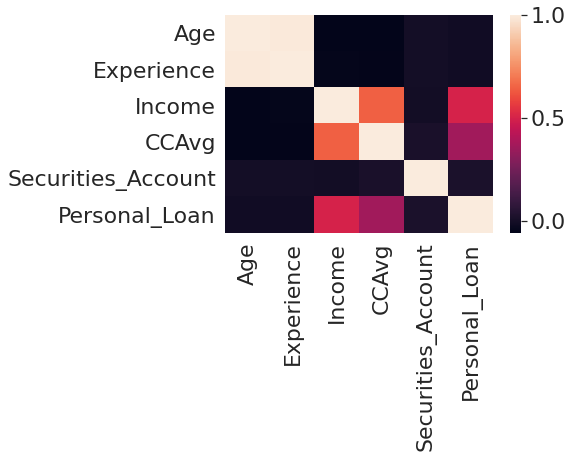

In [ ]:
sns.heatmap(lm[["Age","Experience","Income","CCAvg","Securities_Account","Personal_Loan"]].corr())

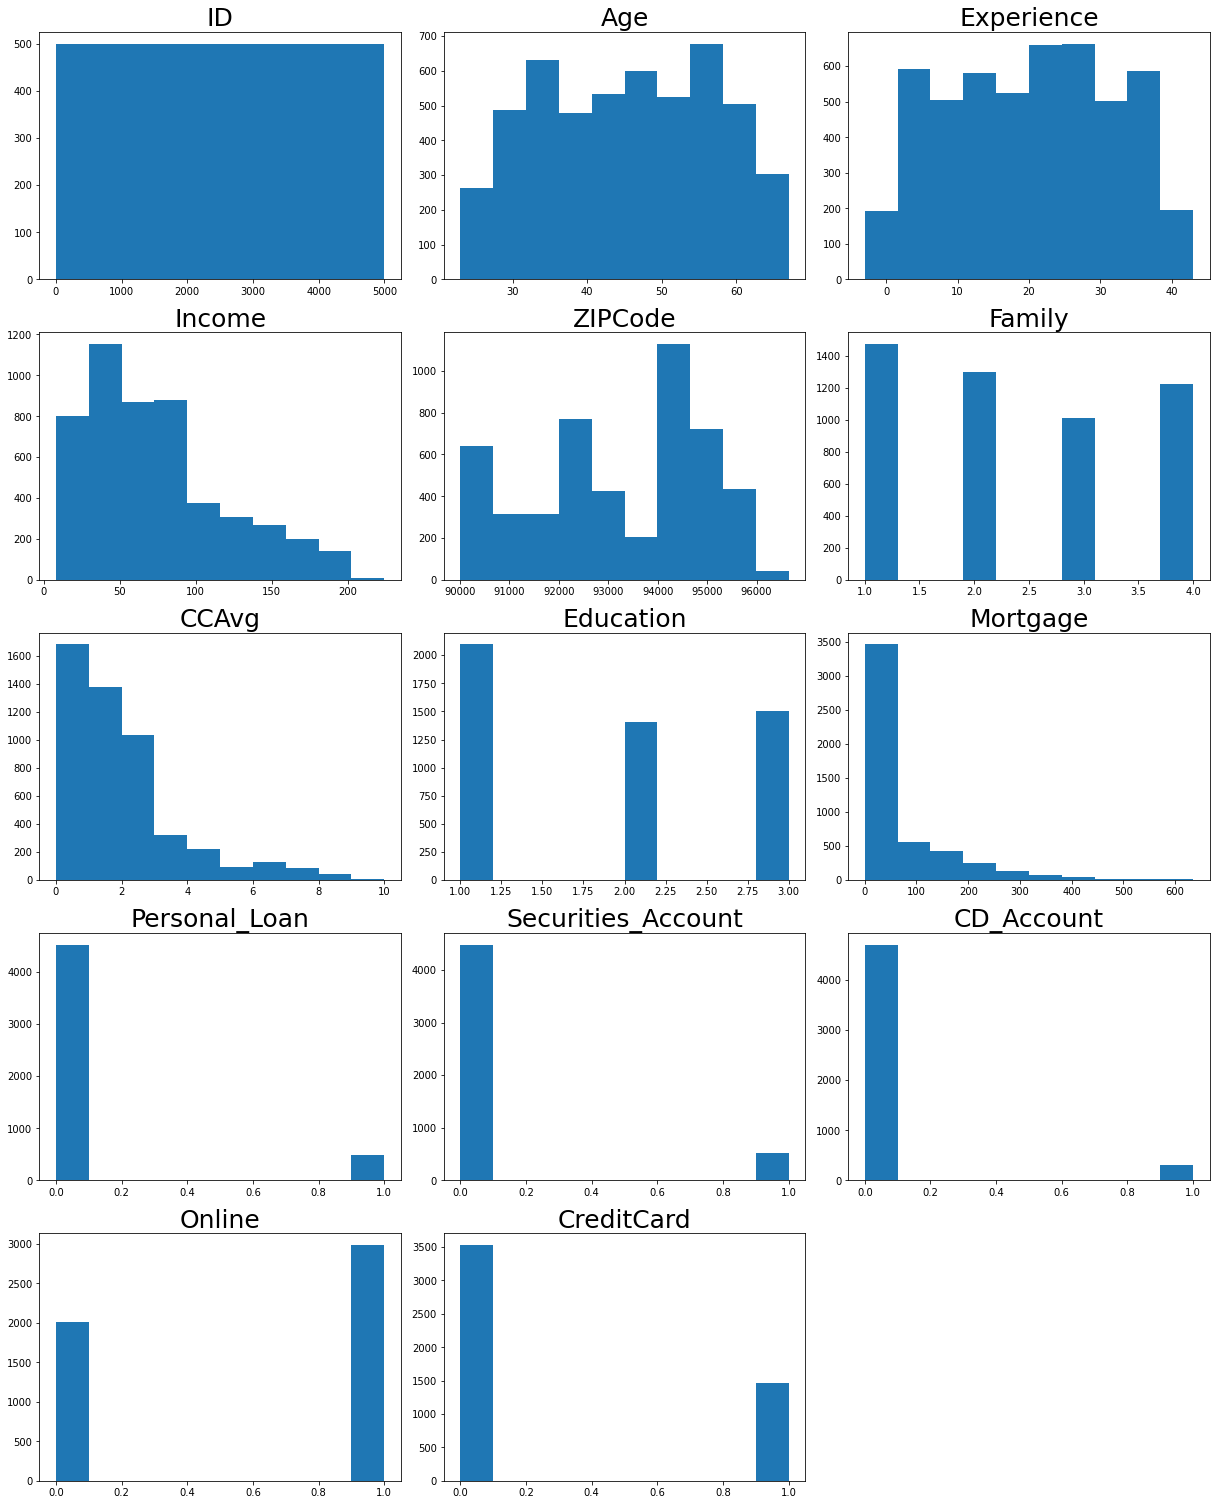

In [ ]:
from scipy.stats import norm
all_col = lm.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(lm[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

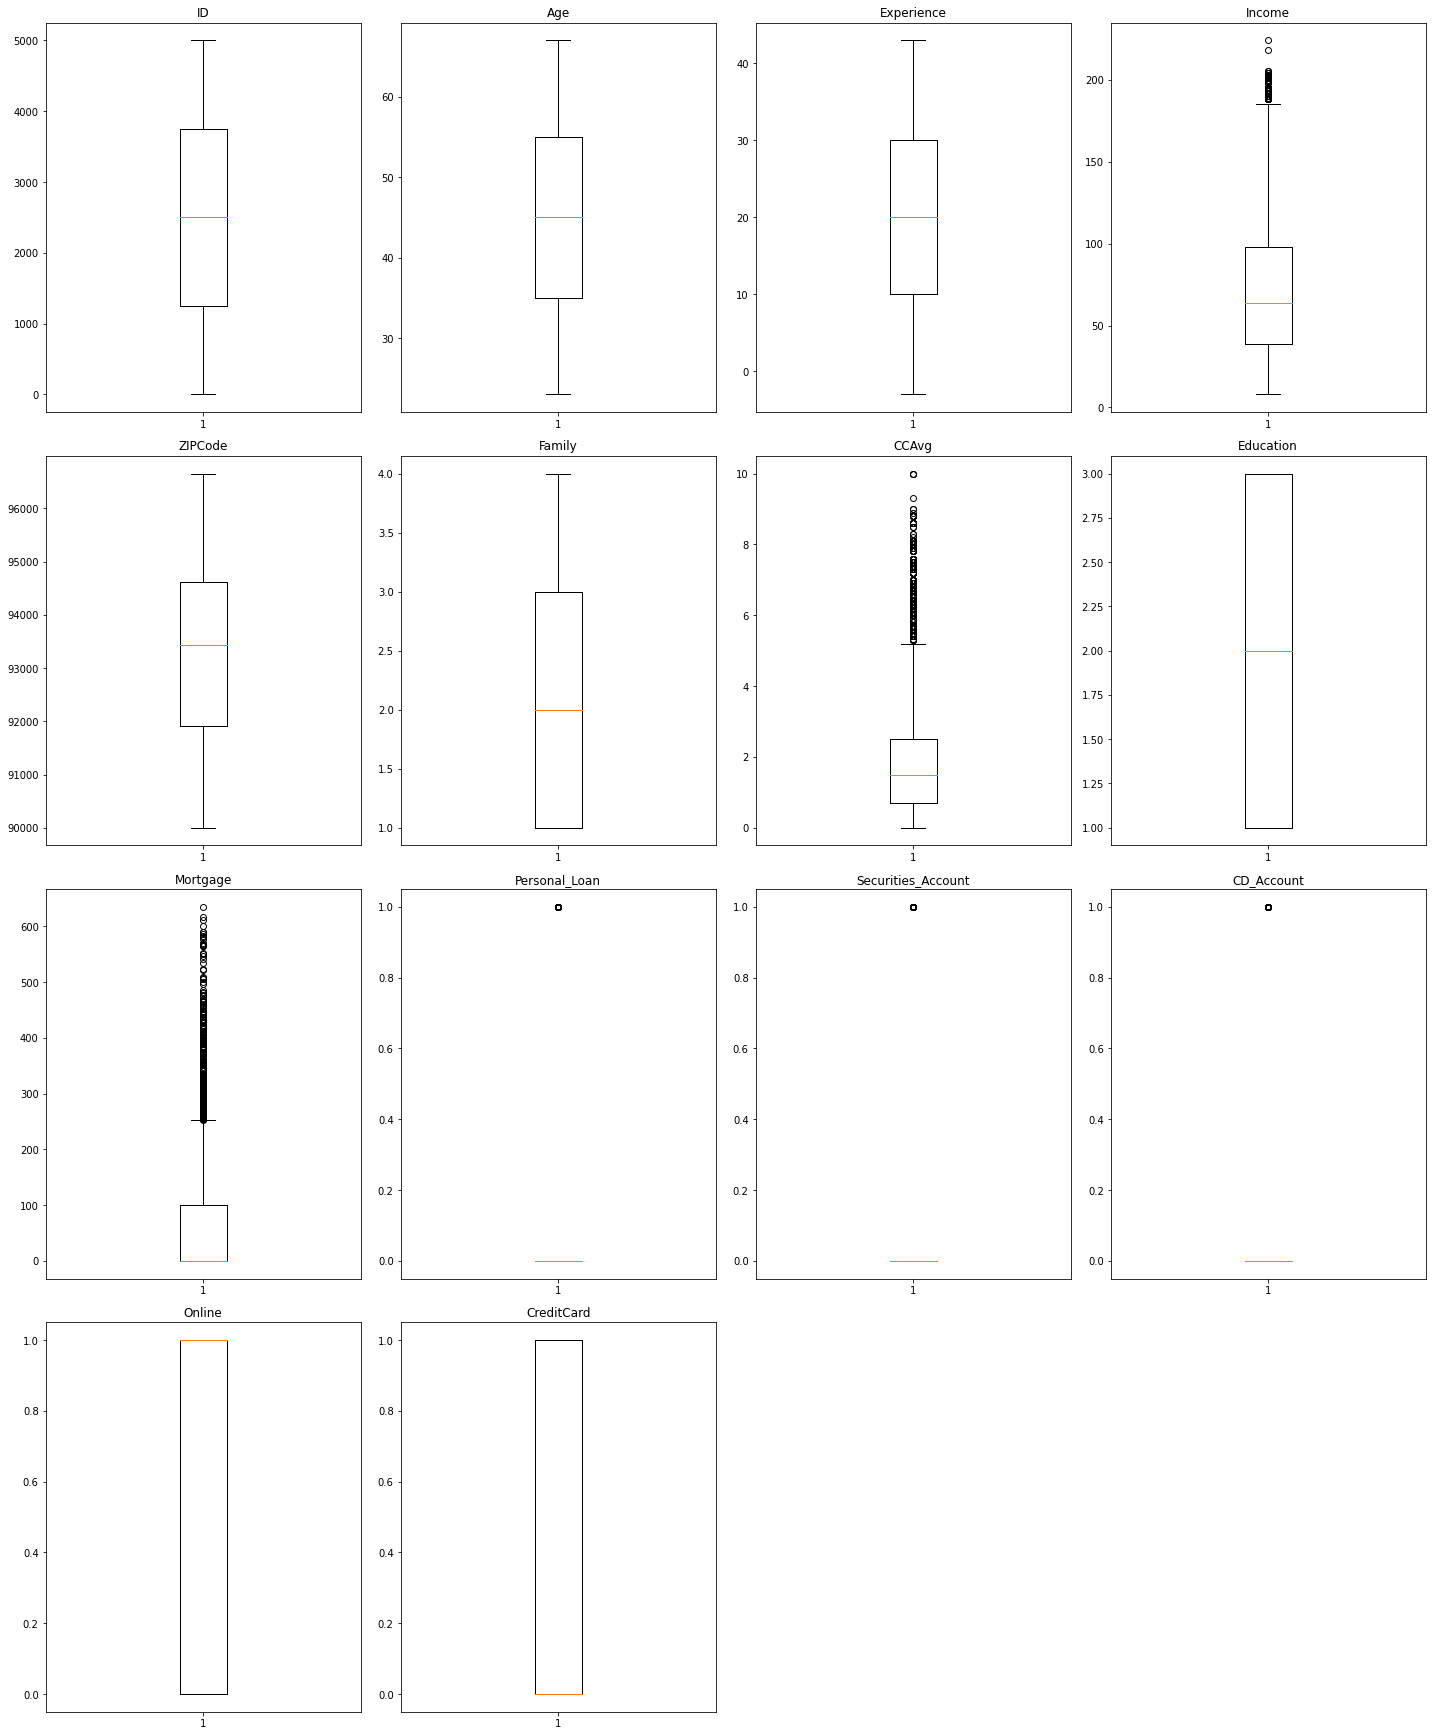

In [ ]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(lm[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

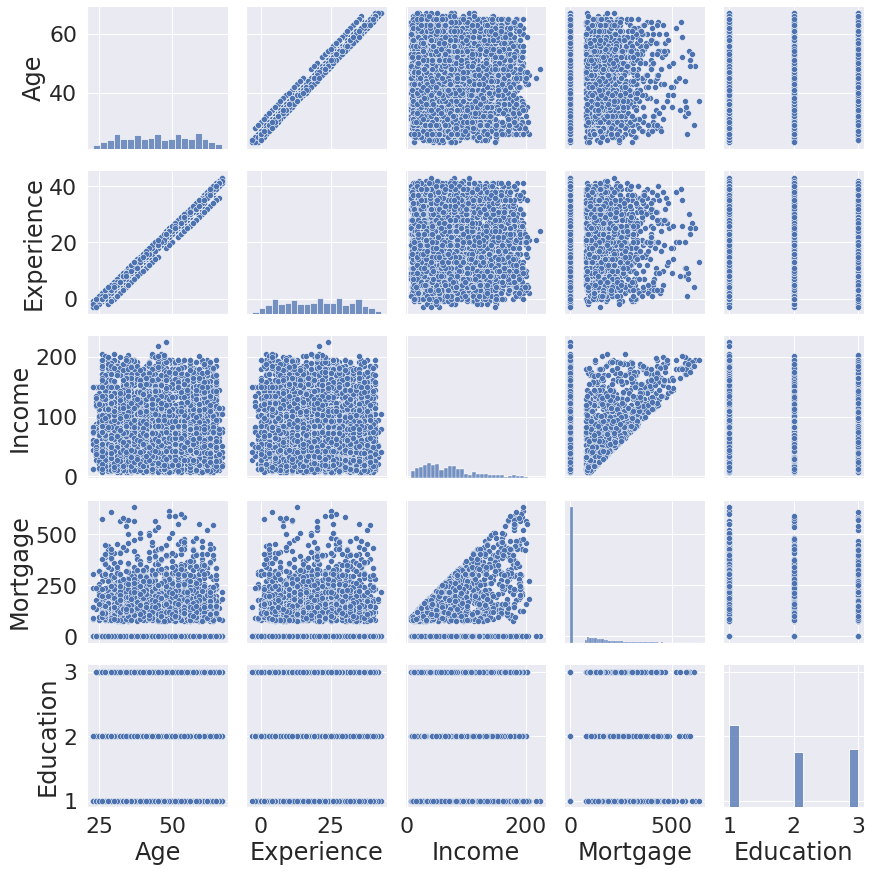

In [ ]:
# RELATION BETWEEN EACH VARIABLE
sns.pairplot(lm, vars = ["Age", "Experience", "Income", "Mortgage", "Education"], dropna = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

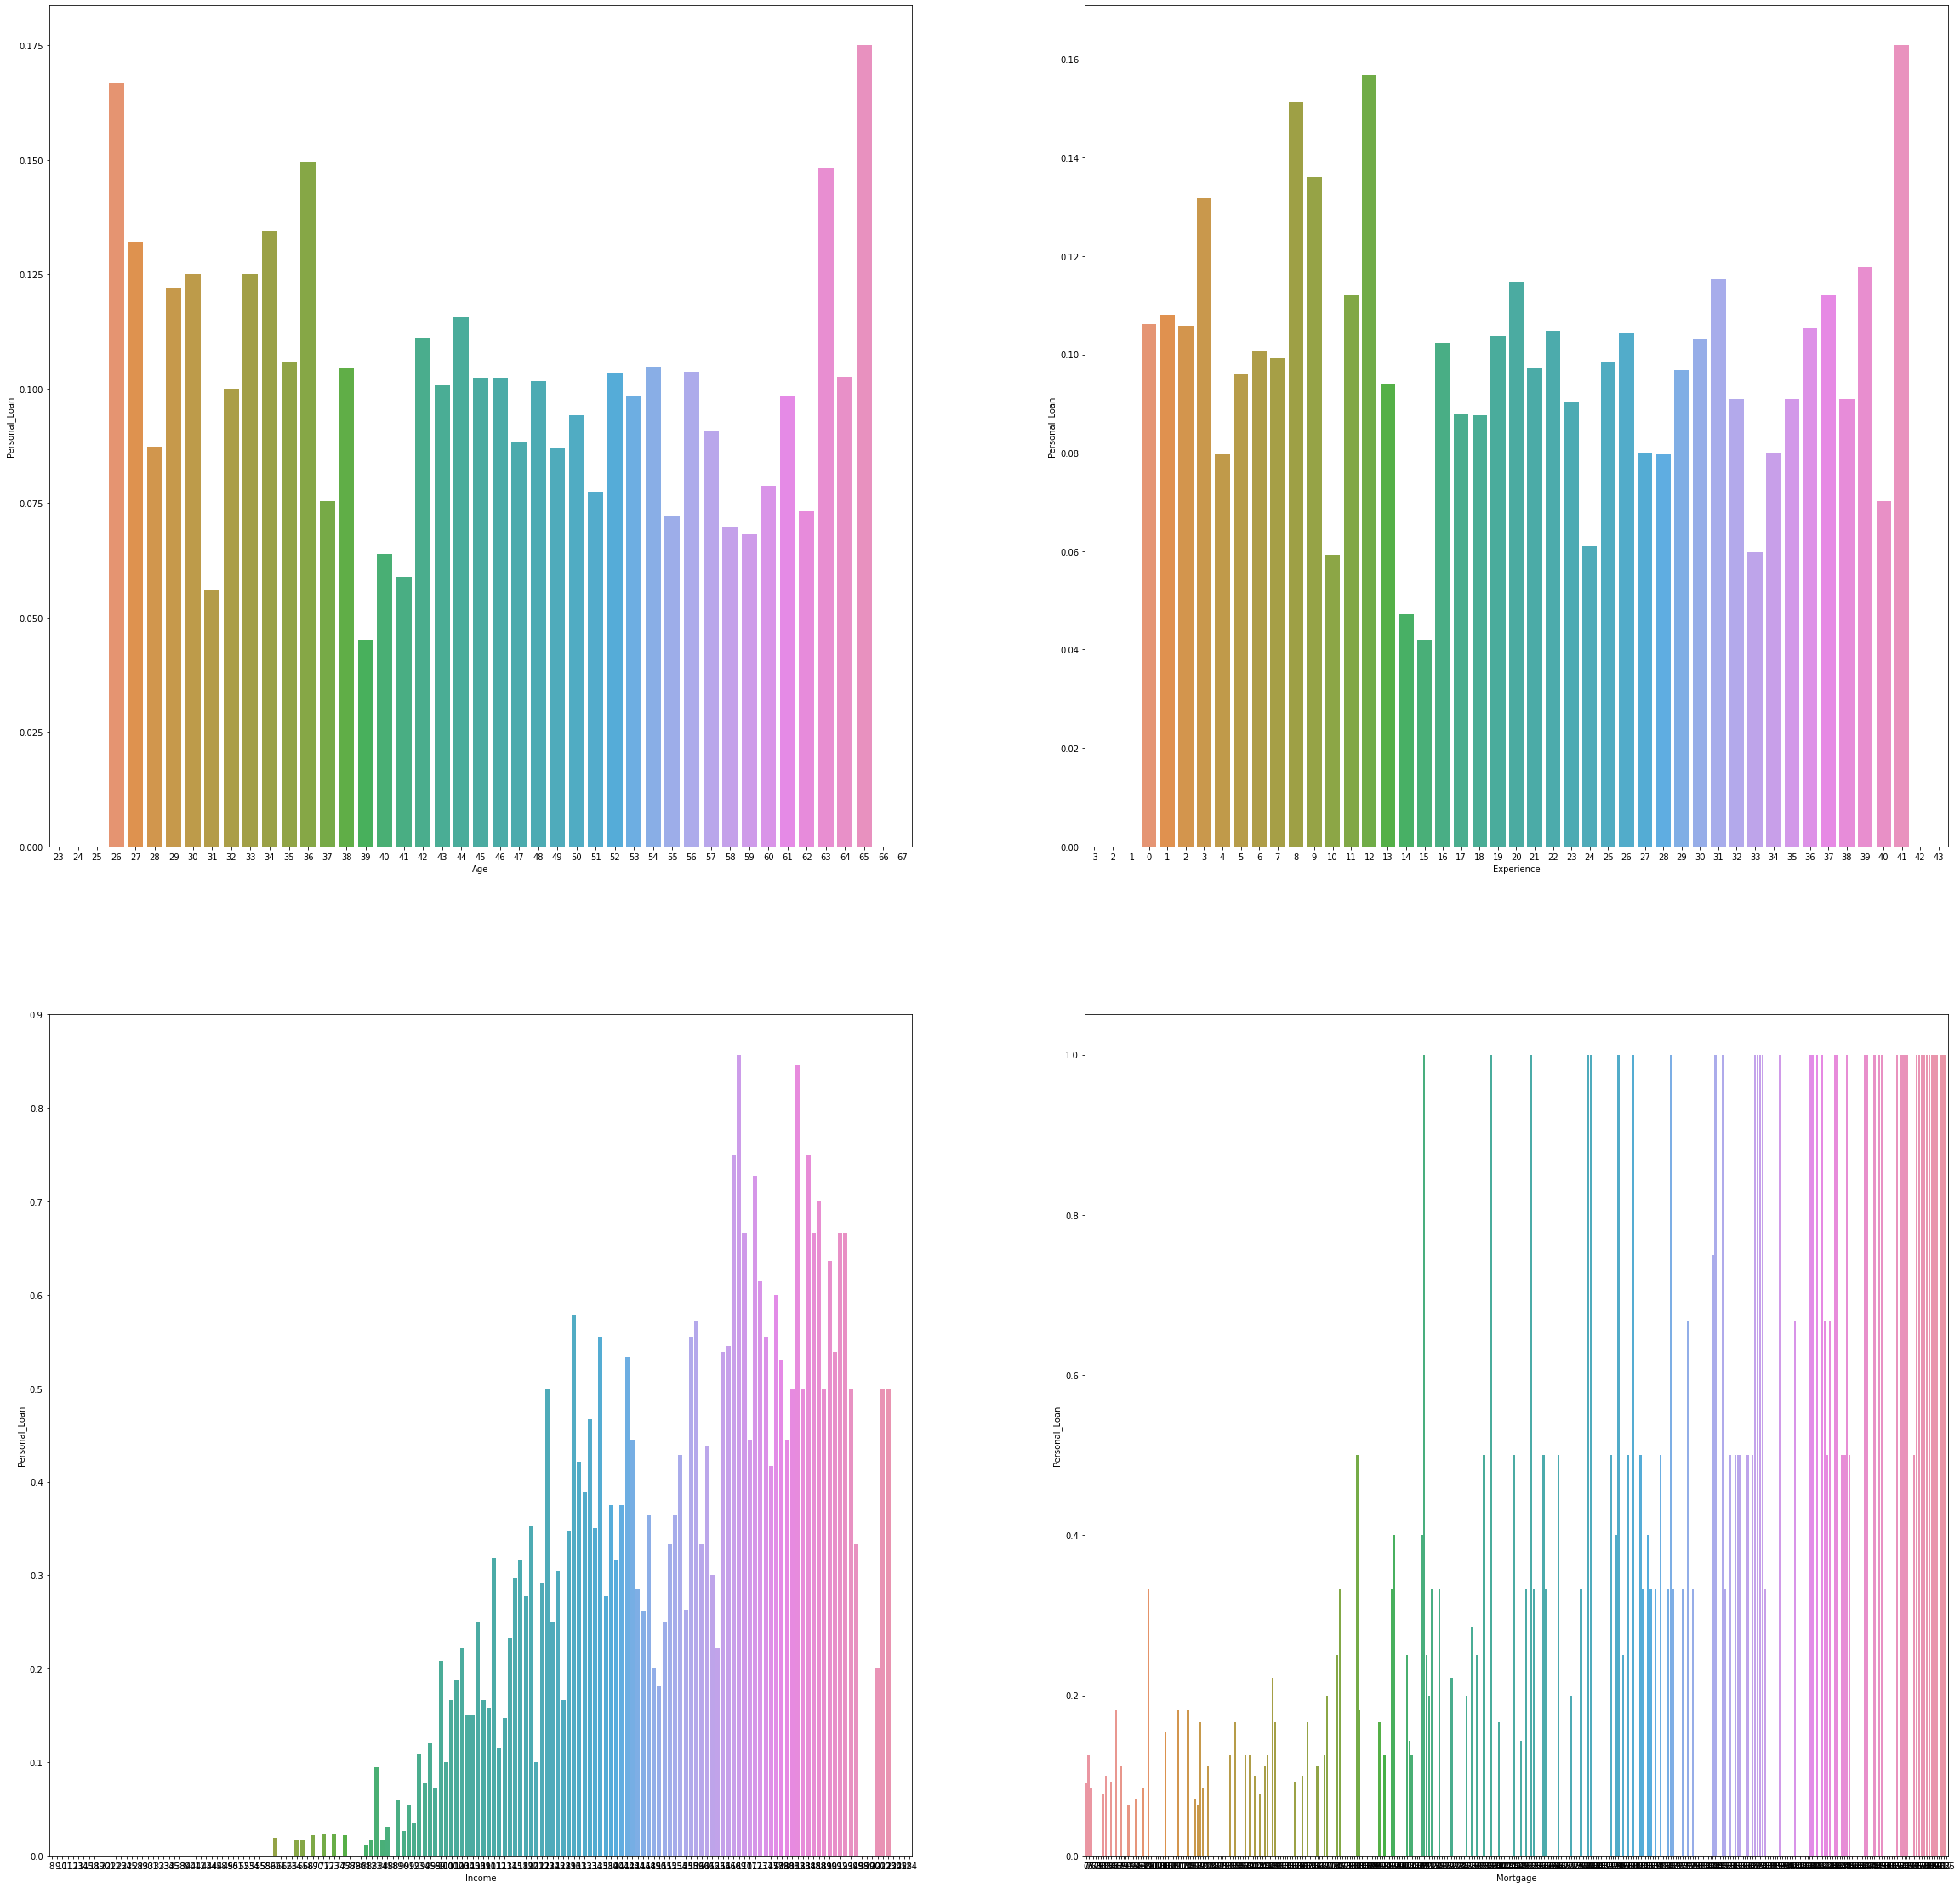

In [ ]:
cols = ["Age","Experience","Income","Mortgage"]
plt.figure(figsize=(40,40))
for i,col in enumerate(cols):
    # print(i, col)
    plt.subplot(2,2,i+1)
    sns.barplot(lm.groupby(col)["Personal_Loan"].mean().index,lm.groupby(col)["Personal_Loan"].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


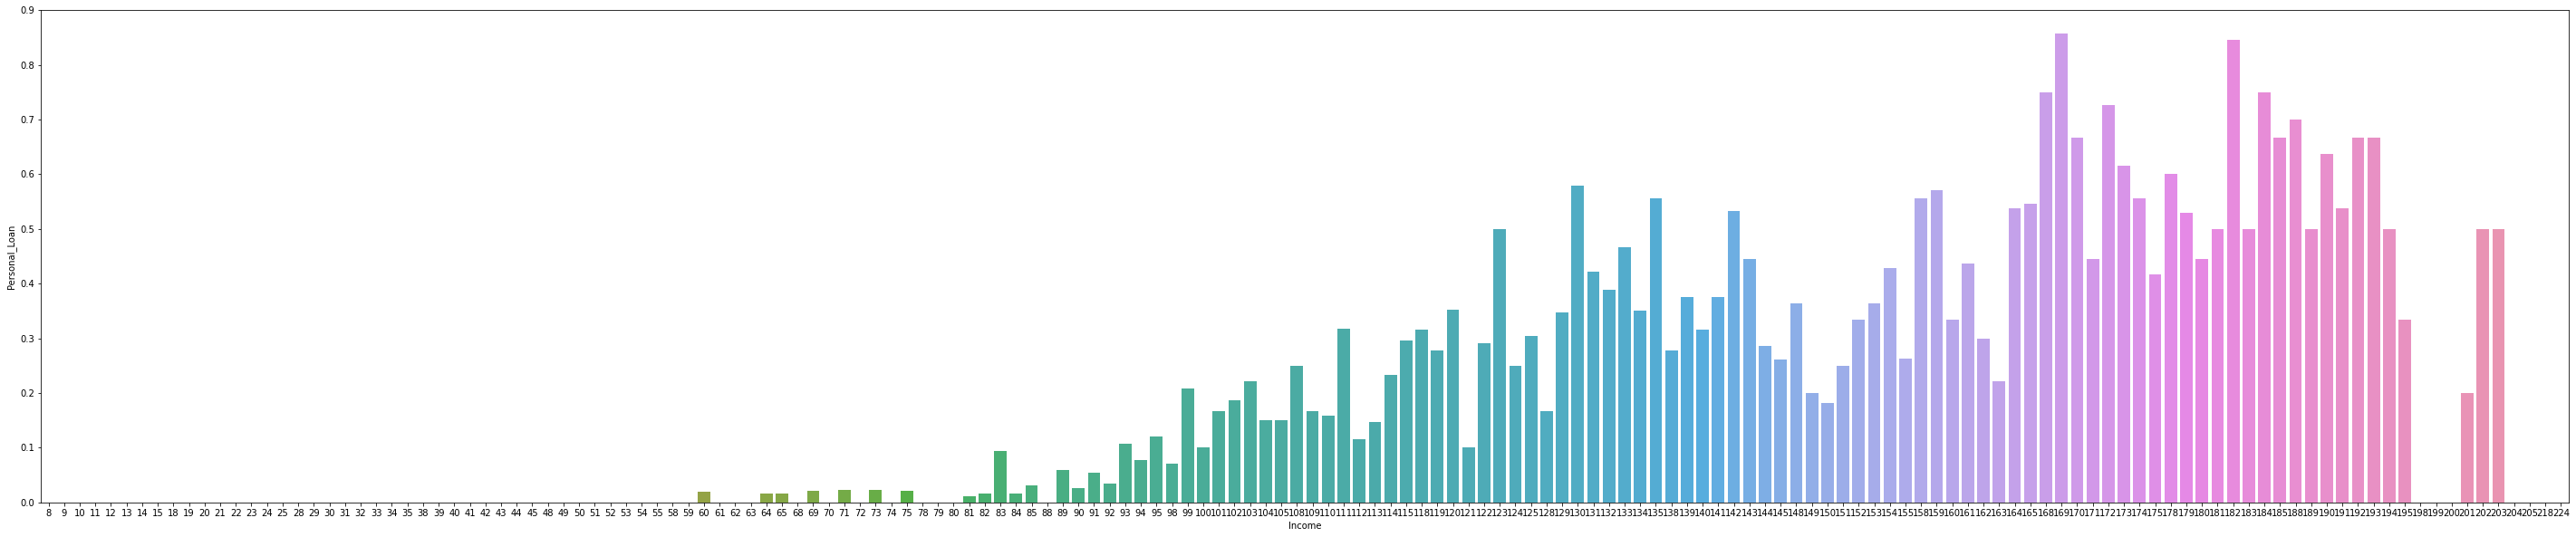

In [ ]:
plt.figure(figsize=(50,10))
sns.barplot(lm.groupby("Income")["Personal_Loan"].mean().index,lm.groupby("Income")["Personal_Loan"].mean())

# DATA PREPROCESSING 
## MISSING VALUE TREATMENT AND OUTLIER DETECTION

In [ ]:
lm['Income'] = lm['Income'].astype('float')
lm['Mortgage'] = lm['Mortgage'].astype('float')
lm['Experience'] = lm['Experience'].astype('float')

In [ ]:
def treat_outliers(lm,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    lm: data frame
    col: name of the column
    '''
    Q1=lm[col].quantile(0.25) # 25th quantile
    Q3=lm[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    lm[col] = np.clip(lm[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return lm

def treat_outliers_all(lm, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    lm: data frame
    '''
    for c in col_list:
        lm = treat_outliers(lm,c)
        
    return lm
    

In [ ]:
numerical_col = lm.select_dtypes(include=np.number).columns.tolist()
lm = treat_outliers_all(lm,numerical_col)

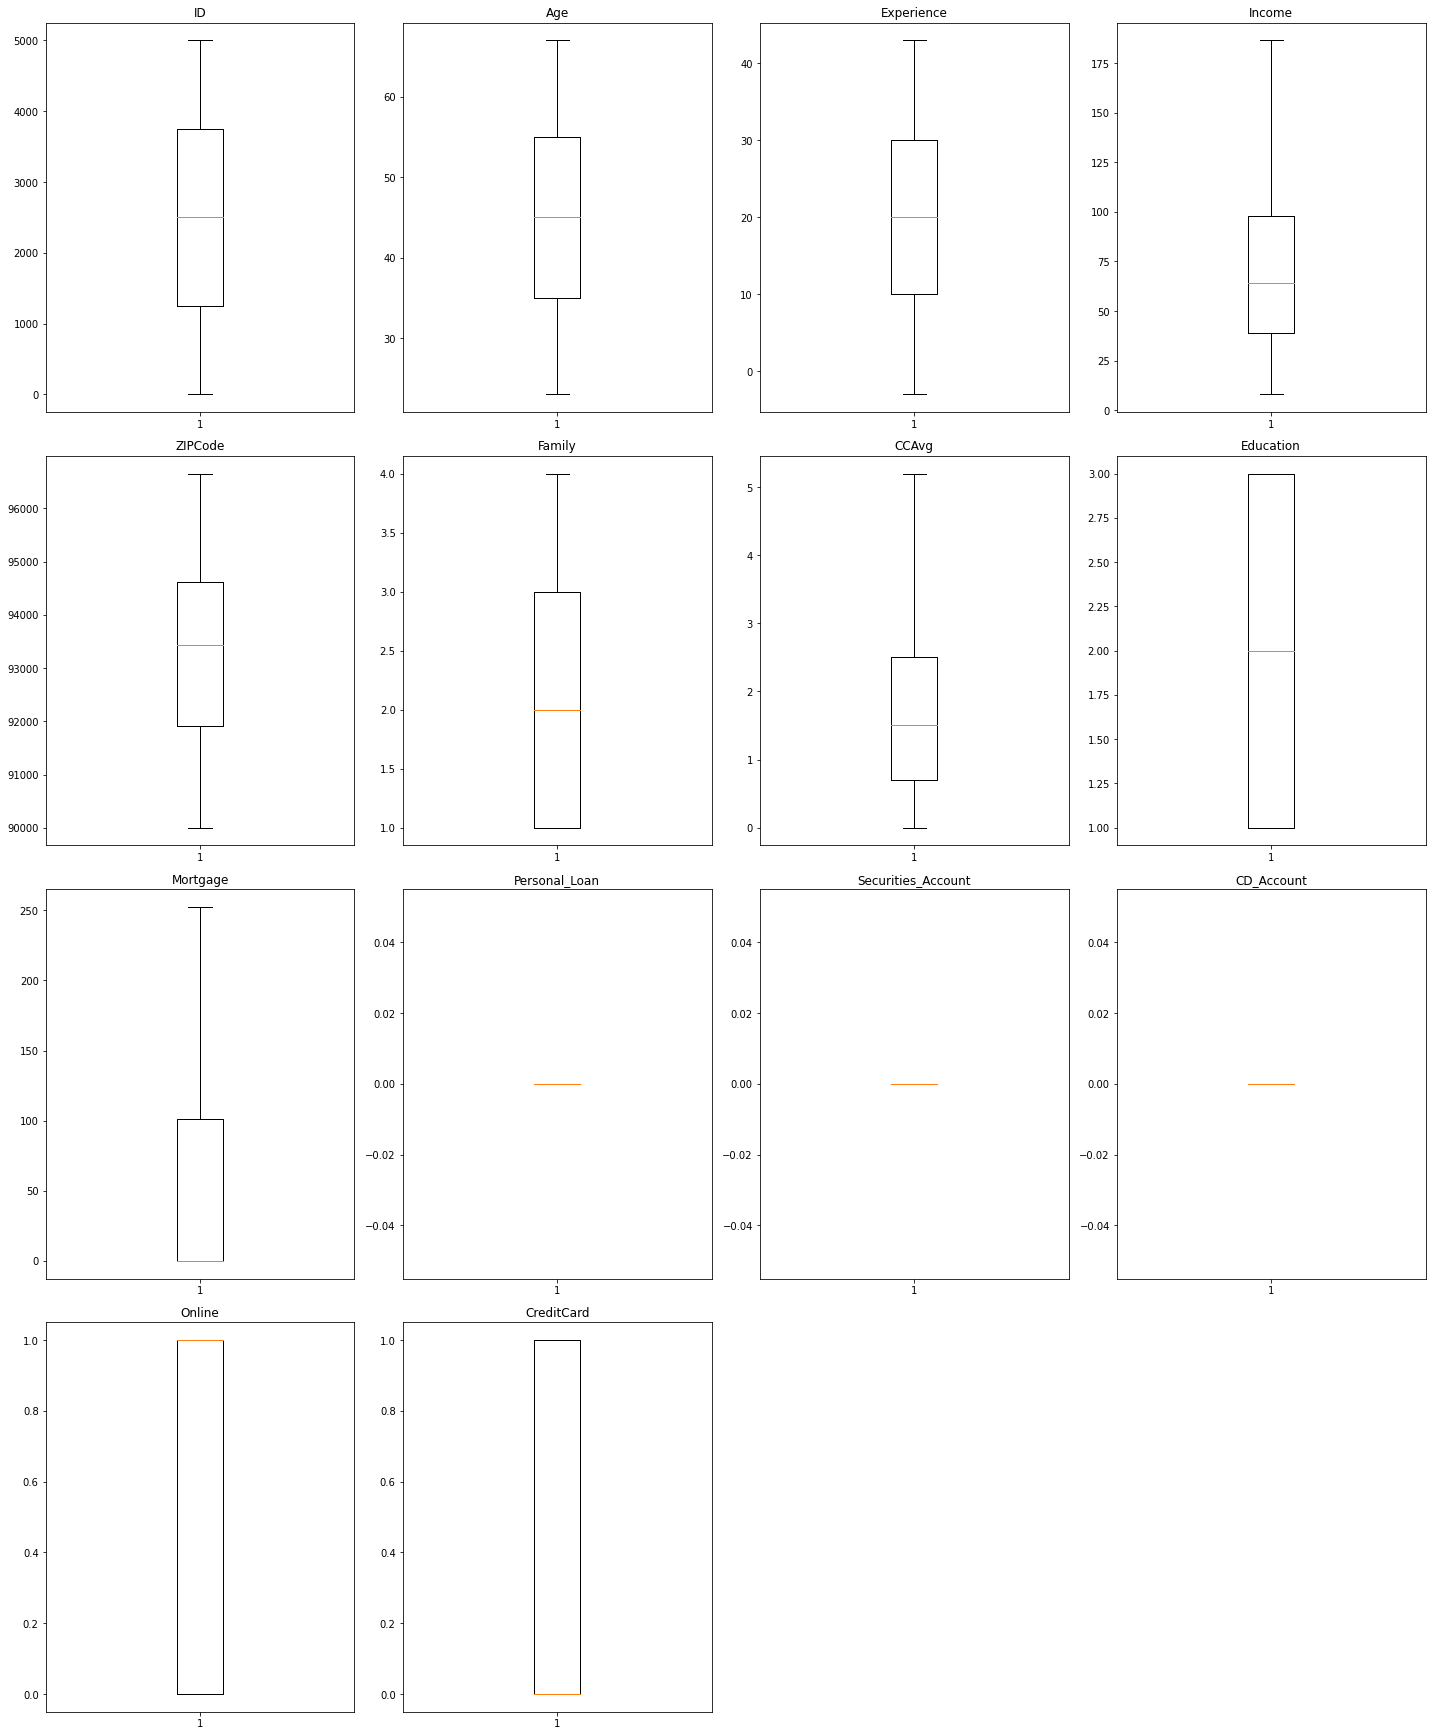

In [ ]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(lm[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

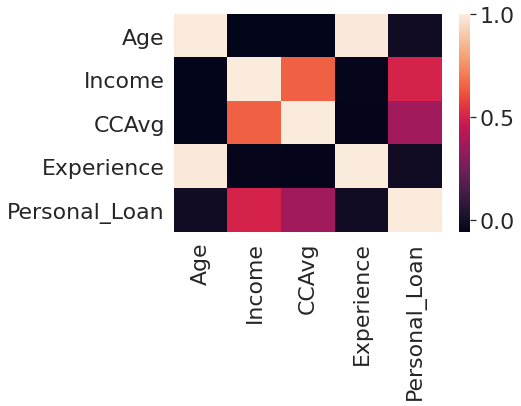

In [ ]:
#CORRELATION BETWEEN INDEPENDENT AND DEPENDENT VARIABLES
sns.heatmap(lm[["Age","Income","CCAvg","Experience","Personal_Loan"]].corr()) 
plt.show()

# MODEL BUILDING

## Logistic Regression

In [ ]:
# Features
X = lm[["Age","Income","CCAvg","Experience"]]
# Labels
Y = lm["Personal_Loan"]

In [ ]:
# Cross Validation for 5 folds
# Logistic Regression
crossval_folds = 5
folds=np.split(X,crossval_folds)
Yfolds = np.split(Y,crossval_folds)
raw=[]
accuracy=[]
acc=[]
for i in range(crossval_folds):
    Xval = folds[i]
    Xtrain = np.concatenate([folds[x] for x in range(crossval_folds) if x!=i],axis=0)
    Yval = Yfolds[i]
    Ytrain = np.concatenate([Yfolds[x] for x in range(crossval_folds) if x!=i],axis=0)

    logisticreg = LogisticRegression()
    logisticreg.fit(Xtrain,Ytrain)

    prediction = logisticreg.predict(Xval)
    acc.append(accuracy_score(Yval,prediction))
print("accuracy scores:",acc)

accuracy scores: [0.92, 0.897, 0.918, 0.905, 0.912]


## DECISION TREE

In [ ]:
# Cross Validation for 5 folds
# Decision Tree
crossval_folds = 5
folds=np.split(X,crossval_folds)
Yfolds = np.split(Y,crossval_folds)
raw=[]
accuracy=[]
acc=[]
for i in range(crossval_folds):
    Xval = folds[i]
    Xtrain = np.concatenate([folds[x] for x in range(crossval_folds) if x!=i],axis=0)
    Yval = Yfolds[i]
    Ytrain = np.concatenate([Yfolds[x] for x in range(crossval_folds) if x!=i],axis=0)

    tree = DecisionTreeClassifier()
    tree.fit(Xtrain,Ytrain)

    prediction = tree.predict(Xval)
    acc.append(accuracy_score(Yval,prediction))
print("accuracy scores:",acc)

accuracy scores: [0.93, 0.914, 0.927, 0.934, 0.933]


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X,Y)
print("Gini Importance for each variable ( lower is better )")
pd.DataFrame({"Columns":["Age","Income","CCAvg","Experience"], "Gini Importance":tree.feature_importances_})


Gini Importance for each variable ( lower is better )


,Columns,Gini Importance
0,Age,0.158
1,Income,0.450
2,CCAvg,0.267
3,Experience,0.125
